# Extracting Vaccination Data, Vaccination sites and number of sesssion data from the api link (Only available from 08-03-2021)

In [ ]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression   # Linear regression
from sklearn.preprocessing import PolynomialFeatures  # Polynomial regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression


In [ ]:

vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]
import time

def extract_data(start, end):
    while start<= end:
        #Using requests to extract the data from the api
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    start = time.time()
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list
    end = time.time()
    print(f"The time taken to run the above block of code is {end - start}")
        
        

The time taken to run the above block of code is 321.0269615650177


In [ ]:
vaccine_stateid=[]
states=[]
title=[]
total=[]
partial_vaccinated=[]
fully_vaccinated=[]
vaccine_date=[]
vaccine_state_title=[]
def extract_data(start, end):
    while start<= end:
        #Using requests to extract the data from the api
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    start = time.time()
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_stateid2=r['getBeneficiariesGroupBy']
        vaccine_date1=r['timestamp']
        for k in vaccine_stateid2:
          states2=k['state_id']
          states.append(states2)
          title2=k['title']
          title.append(title2)
          total2=k['total']
          total.append(total2)
          partial_vaccinated2=k['partial_vaccinated']
          partial_vaccinated.append(partial_vaccinated2)
          fully_vaccinated2=k['totally_vaccinated']
          fully_vaccinated.append(fully_vaccinated2)
        vaccine_date.append(vaccine_date1)
          #08March onwards data is there in the API
        vaccine_stateid.append(vaccine_stateid2) #Storing the vaccine sessions in a list

    end = time.time()
    print(f"The time taken to run the above block of code is {end - start}")

The time taken to run the above block of code is 306.5975549221039


In [ ]:
len(vaccine_date)

274

In [ ]:
date_vaccine=[]

In [ ]:
new_list=[]
from itertools import repeat
for i in range(0,len(vaccine_date)):
  new_list.extend(repeat(vaccine_date[i],37))

#new_list.extend([vaccine_date for j in (vaccine_date) for i in range(0,len(vaccine_date))])
print(new_list)
len(new_list)

['2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-0

10138

In [ ]:
Vaccination_data_statewise = pd.DataFrame(
    {'state_id': states,
     'Title': title,
     'Total': total,
     'Partial vaccinated':partial_vaccinated,
     'Fully Vaccinated':fully_vaccinated
    })
print(Vaccination_data_statewise)

      state_id  ... Fully Vaccinated
0            1  ...             2374
1            2  ...           196326
2            3  ...            10494
3            4  ...            61223
4            5  ...           210740
...        ...  ...              ...
10133       33  ...          2050192
10134       34  ...         53248602
10135       35  ...          5352364
10136       36  ...         30935411
10137       37  ...           217029

[10138 rows x 5 columns]


In [ ]:
Vaccination_data_statewise['Title'].value_counts()

Goa                            274
Sikkim                         274
Dadra and Nagar Haveli         274
Arunachal Pradesh              274
Telangana                      274
Meghalaya                      274
Mizoram                        274
Punjab                         274
Kerala                         274
Assam                          274
Madhya Pradesh                 274
Jammu and Kashmir              274
Karnataka                      274
Puducherry                     274
Lakshadweep                    274
Andaman and Nicobar Islands    274
Uttarakhand                    274
Haryana                        274
Odisha                         274
Nagaland                       274
Ladakh                         274
Chhattisgarh                   274
Himachal Pradesh               274
Gujarat                        274
Chandigarh                     274
Tripura                        274
Delhi                          274
Bihar                          274
Jharkhand           

In [ ]:
Vaccination_data_statewise.head(40)

,state_id,Title,Total,Partial vaccinated,Fully Vaccinated
0,1,Andaman and Nicobar Islands,9634,7260,2374
1,2,Andhra Pradesh,693146,496820,196326
2,3,Arunachal Pradesh,39569,29075,10494
3,4,Assam,391651,330428,61223
4,5,Bihar,783296,572556,210740
5,6,Chandigarh,30339,26736,3603
6,7,Chhattisgarh,561149,427770,133379
7,8,Dadra and Nagar Haveli,6868,5746,1122
8,9,Delhi,458286,382337,75949
9,10,Goa,40444,33101,7343


In [ ]:
Vaccination_data_statewise['Date']=new_list

In [ ]:
Vaccination_data_statewise

,state_id,Title,Total,Partial vaccinated,Fully Vaccinated,Date
0,1,Andaman and Nicobar Islands,9634,7260,2374,2021-03-08 18:00:53
1,2,Andhra Pradesh,693146,496820,196326,2021-03-08 18:00:53
2,3,Arunachal Pradesh,39569,29075,10494,2021-03-08 18:00:53
3,4,Assam,391651,330428,61223,2021-03-08 18:00:53
4,5,Bihar,783296,572556,210740,2021-03-08 18:00:53
...,...,...,...,...,...,...
10133,33,Tripura,4608104,2557912,2050192,2021-12-06 08:00
10134,34,Uttar Pradesh,167809898,114561296,53248602,2021-12-06 08:00
10135,35,Uttarakhand,12975396,7623032,5352364,2021-12-06 08:00
10136,36,West Bengal,94633150,63697739,30935411,2021-12-06 08:00


In [ ]:
Vaccination_data_statewise.to_csv("vaccination_statewise.csv")

In [ ]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [ ]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,0.0,0.0,0.0,0.0,35920.0,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0
266,1232700453,630652893,597587294,281138,1090939962,136453732,7819598,787789011.0,444911442.0,1.232700e+09,0.0,0.0,0.0,0.0,36176.0,2391268.0,5428330.0,3895552.0,3921968.0,2077.0,307.0,1127631.0,4185745.0,1552957.0,2632788.0
267,1241392075,634992486,601937100,283361,1098824692,137258394,8035754,790594807.0,450797268.0,1.241392e+09,0.0,0.0,0.0,0.0,36176.0,2552683.0,5483071.0,4011663.0,4022059.0,2031.0,201.0,1129861.0,7855976.0,2408779.0,5447197.0
268,1249869106,639275932,606128495,285551,1106532101,138026064,7974702,792887779.0,456981327.0,1.249869e+09,0.0,0.0,0.0,0.0,36339.0,2097083.0,5877619.0,4032710.0,3939965.0,2027.0,210.0,1131813.0,8078978.0,2571975.0,5507003.0


#Creating the dates column to be added to the dataframe 

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html


start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [ ]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02'],
              dtype='datetime64[ns]', length=270, freq='D')

In [ ]:
type(dates_vaccine)


pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine 

In [ ]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,0.0,0.0,0.0,0.0,35920.0,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0,2021-11-28
266,1232700453,630652893,597587294,281138,1090939962,136453732,7819598,787789011.0,444911442.0,1.232700e+09,0.0,0.0,0.0,0.0,36176.0,2391268.0,5428330.0,3895552.0,3921968.0,2077.0,307.0,1127631.0,4185745.0,1552957.0,2632788.0,2021-11-29
267,1241392075,634992486,601937100,283361,1098824692,137258394,8035754,790594807.0,450797268.0,1.241392e+09,0.0,0.0,0.0,0.0,36176.0,2552683.0,5483071.0,4011663.0,4022059.0,2031.0,201.0,1129861.0,7855976.0,2408779.0,5447197.0,2021-11-30
268,1249869106,639275932,606128495,285551,1106532101,138026064,7974702,792887779.0,456981327.0,1.249869e+09,0.0,0.0,0.0,0.0,36339.0,2097083.0,5877619.0,4032710.0,3939965.0,2027.0,210.0,1131813.0,8078978.0,2571975.0,5507003.0,2021-12-01


In [ ]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [ ]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[1:-1]

vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,0.0,0.0,0.0,0.0,35770.0,2545863.0,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27
265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,0.0,0.0,0.0,0.0,35920.0,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0,2021-11-28
266,1232700453,630652893,597587294,281138,1090939962,136453732,7819598,787789011.0,444911442.0,1.232700e+09,0.0,0.0,0.0,0.0,36176.0,2391268.0,5428330.0,3895552.0,3921968.0,2077.0,307.0,1127631.0,4185745.0,1552957.0,2632788.0,2021-11-29


In [ ]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

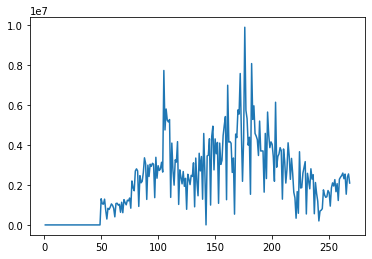

In [ ]:
vaccine_dataframe['today_dose_one'].plot()

In [ ]:
#Replacing the null values with 0
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,0.0,0.0,0.0,0.0,35770.0,2545863.0,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27
265,265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,0.0,0.0,0.0,0.0,35920.0,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0,2021-11-28
266,266,1232700453,630652893,597587294,281138,1090939962,136453732,7819598,787789011.0,444911442.0,1.232700e+09,0.0,0.0,0.0,0.0,36176.0,2391268.0,5428330.0,3895552.0,3921968.0,2077.0,307.0,1127631.0,4185745.0,1552957.0,2632788.0,2021-11-29
267,267,1241392075,634992486,601937100,283361,1098824692,137258394,8035754,790594807.0,450797268.0,1.241392e+09,0.0,0.0,0.0,0.0,36176.0,2552683.0,5483071.0,4011663.0,4022059.0,2031.0,201.0,1129861.0,7855976.0,2408779.0,5447197.0,2021-11-30


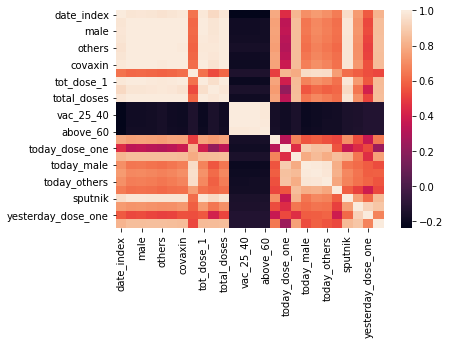

In [ ]:
import seaborn as sns
sns.heatmap(vaccine_dataframe1.corr())

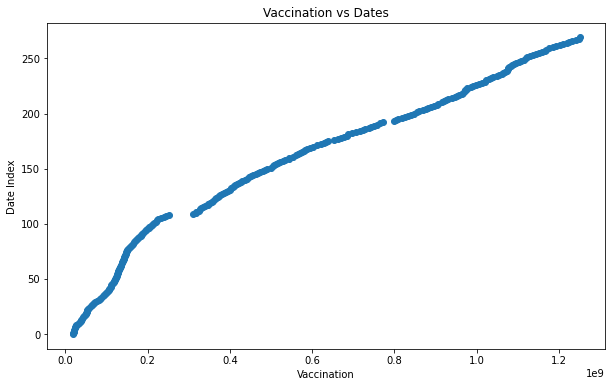

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(vaccine_dataframe1['total'],vaccine_dataframe1['date_index'])
ax.set(title = "Vaccination vs Dates",
       xlabel = "Vaccination",
       ylabel = "Date Index")

plt.show()

In [ ]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
vaccine_dataframe

#vaccine_dataframe.set_index('date_index')

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,2021-11-27,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,0.0,0.0,0.0,0.0,35770.0,2545863.0,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0
265,265,2021-11-28,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,0.0,0.0,0.0,0.0,35920.0,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0
266,266,2021-11-29,1232700453,630652893,597587294,281138,1090939962,136453732,7819598,787789011.0,444911442.0,1.232700e+09,0.0,0.0,0.0,0.0,36176.0,2391268.0,5428330.0,3895552.0,3921968.0,2077.0,307.0,1127631.0,4185745.0,1552957.0,2632788.0
267,267,2021-11-30,1241392075,634992486,601937100,283361,1098824692,137258394,8035754,790594807.0,450797268.0,1.241392e+09,0.0,0.0,0.0,0.0,36176.0,2552683.0,5483071.0,4011663.0,4022059.0,2031.0,201.0,1129861.0,7855976.0,2408779.0,5447197.0


In [ ]:
!pip install autoviz

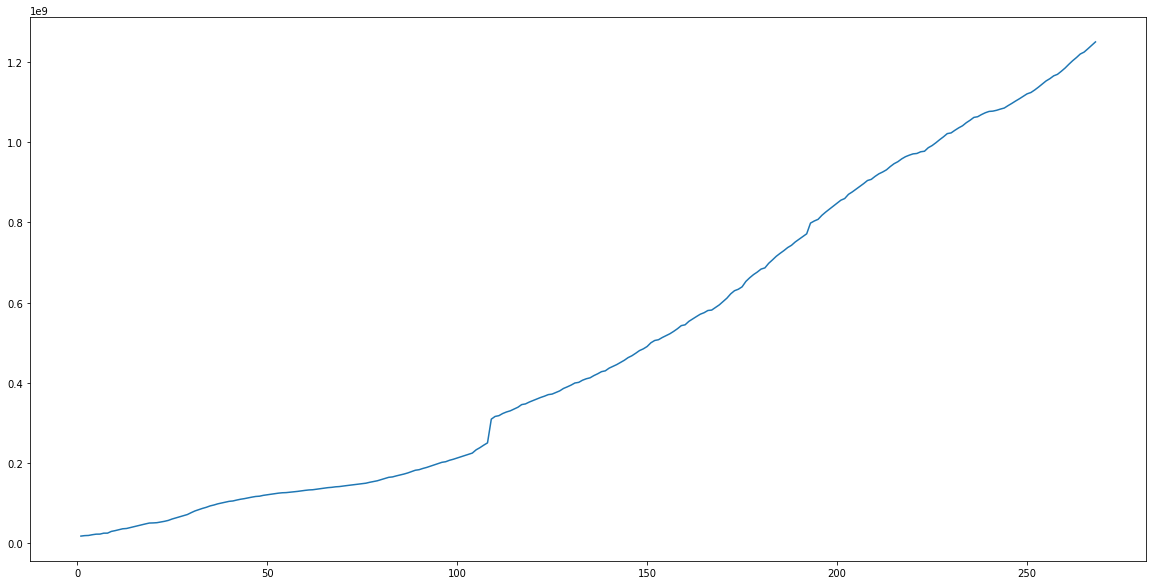

In [ ]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [ ]:
X = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

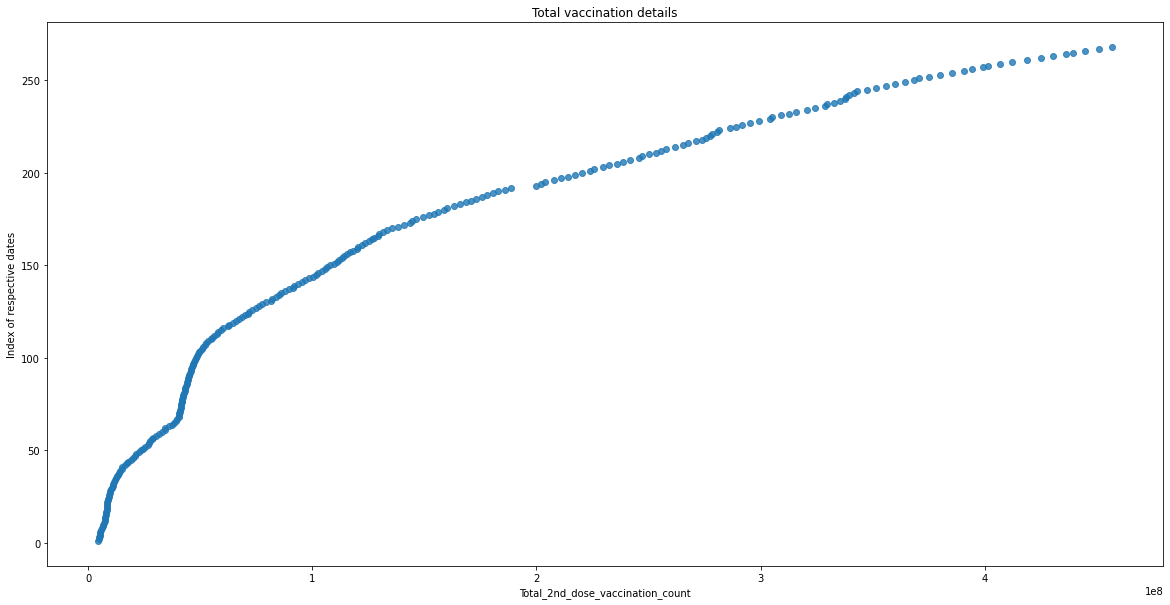

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [ ]:
y.shape


(268, 1)

In [ ]:
#Creating an instance of Linear Regression Library
regression = LinearRegression()

regression.fit(X, y)

LinearRegression()

In [ ]:
m = regression.coef_  
m = float(m)
m

5.768438803061159e-07

In [ ]:
c = regression.intercept_
c = float(c)
c

56.851577018736066

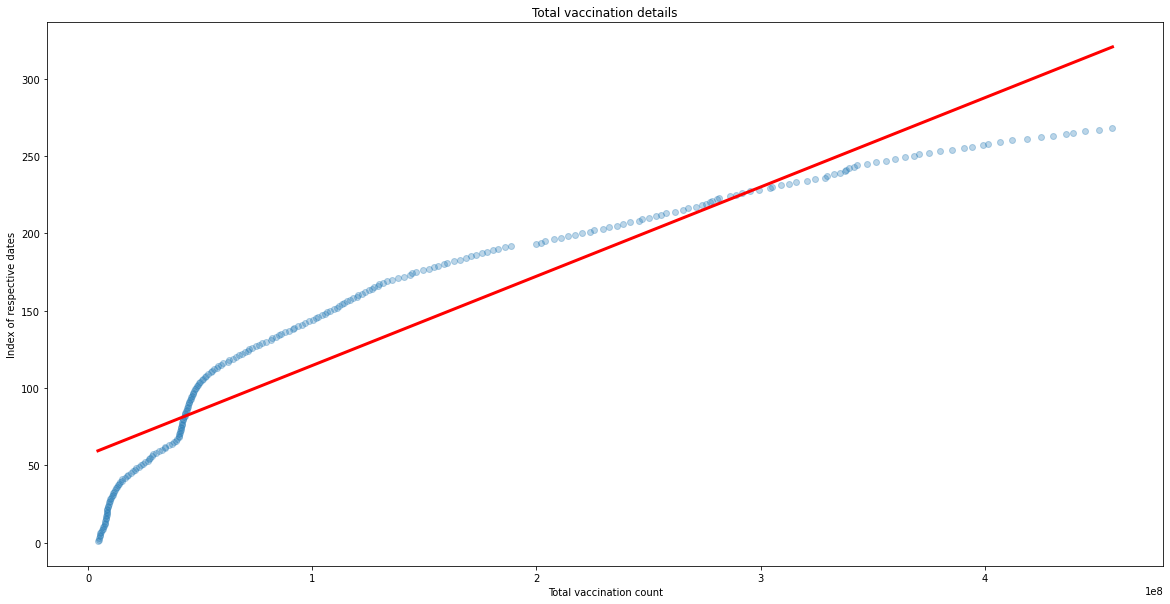

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)


plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [ ]:
regression.score(X, y)

0.879712839304525

In [ ]:
x0 = 958174818

In [ ]:
y0 = (m*x0) + c

In [ ]:
y0

609.5688570454624

In [ ]:
# Date for fully vaccination
fully_vaccination_date = start_date + timedelta(y0)
fully_vaccination_date

datetime.date(2022, 11, 7)

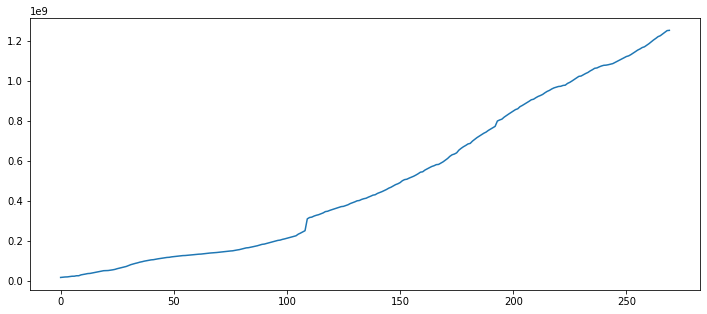

In [ ]:
vaccine_dataframe1['total'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(vaccine_dataframe1['total'])

1. ADF :  2.8931703529037365
2. P-Value :  1.0
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 265
5. Critical Values :
	 1% :  -3.4552699038400827
	 5% :  -2.8725092359464526
	 10% :  -2.5726152830188678


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 12.7 MB/s 
     |████████████████████████████████| 9.8 MB 39.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Prediction using polynomial regression

In [ ]:
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(X)
#y_poly = polynomial_features.fit_transform(y)
regression_model = LinearRegression()


regression_model.fit(x_poly, y)
y_pred = regression_model.predict(x_poly)



In [ ]:
x_poly[:5]

array([[1.00000000e+00, 4.35703700e+06, 1.89837714e+13],
       [1.00000000e+00, 4.66576200e+06, 2.17693350e+13],
       [1.00000000e+00, 4.74961200e+06, 2.25588142e+13],
       [1.00000000e+00, 5.16014000e+06, 2.66270448e+13],
       [1.00000000e+00, 5.46086200e+06, 2.98210138e+13]])

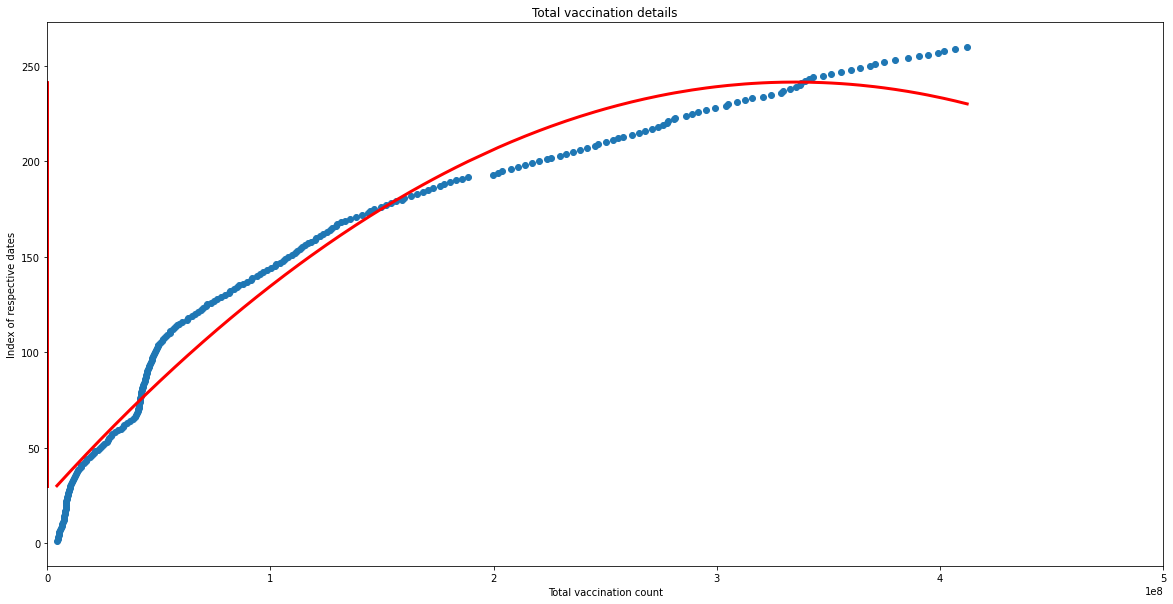

In [ ]:
plt.figure(figsize=(20,10))


plt.plot(x_poly, y_pred, color='red', linewidth=3)

plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
plt.xlim()

plt.scatter(X, y, alpha=1)
#plt.ylim()
plt.xlim(0,500000000)
plt.show()

In [ ]:
x_prediction_1 = pd.DataFrame([958174818])
x_prediction = polynomial_features.fit_transform(x_prediction_1)
type(x_prediction)

numpy.ndarray

In [ ]:
y_pred = regression_model.predict(x_prediction)
y_pred

array([[-508.37257113]])

In [ ]:
m1 = regression_model.coef_

In [ ]:
c1 = regression_model.intercept_

In [ ]:
fully_vaccination_date_poly = start_date + timedelta(int(y_pred))
fully_vaccination_date_poly

datetime.date(2019, 10, 17)

In [ ]:
# Decision tree

In [ ]:
regression_tree_model = DecisionTreeRegressor(random_state = 0)

In [ ]:
regression_tree_model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_new = regression_tree_model.predict([[668174818]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_new

array([260.])

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [ ]:
svr=SVR(kernel='poly')
df=DecisionTreeRegressor(criterion='absolute_error')
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor(loss='huber',criterion='absolute_error')

In [ ]:
clf = svr.fit(vaccine_dataframe[['total']], vaccine_dataframe[['date_index']])
y_pred = clf.predict([[1380004385]])
fully_vaccination_date = start_date + timedelta(int(y_pred))
print(fully_vaccination_date)

2022-05-03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
